In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import xarray as xr
import spatialproteomics as sp
import matplotlib.pyplot as plt
from glob import glob
from tqdm.auto import tqdm
import gc
import os
import seaborn as sns
from glob import glob
import matplotlib as mpl

# Load the custom style from your .ini file
# mpl.style.core.use('pub_matplotlib_rc.ini')

ct_marker_dict = {'B cell': 'PAX5', 'T cell': 'CD3', 'Myeloid cell': 'CD11b', 'Dendritic cell': 'CD11c', 'Macrophage': 'CD68', 'Stromal cell': 'CD90', 'Stromal cell': 'Podoplanin', 'Endothelial cell': 'CD31', 'Endothelial cell': 'CD34'}
celltype_colors = {'B cell': '#5799d1', 'T cell': '#ebc850', 'Myeloid cell': '#de6866', 'Dendritic cell': '#4cbcbd', 'Macrophage': '#bb7cb4', 'Stromal cell': '#62b346', 'Endothelial cell': '#bf997d'}
marker_colors = {'PAX5': '#5799d1', 'CD3': '#ebc850', 'CD11b': '#de6866', 'CD11c': '#4cbcbd', 'CD68': '#bb7cb4', 'CD90': '#62b346', 'Podoplanin': '#62b346', 'CD31': '#bf997d', 'CD34': '#bf997d'}
markers = marker_colors.keys()

def box_center(box):
    x_center = (box[0][0] + box[0][1]) / 2
    y_center = (box[1][0] + box[1][1]) / 2
    return x_center, y_center

In [2]:
BASE_PATH = "/g/huber/users/meyerben/data/codex/BNHL/data_for_publication/wsis"
file_name = 'DLBCL_4.zarr'
font_size = 6.5

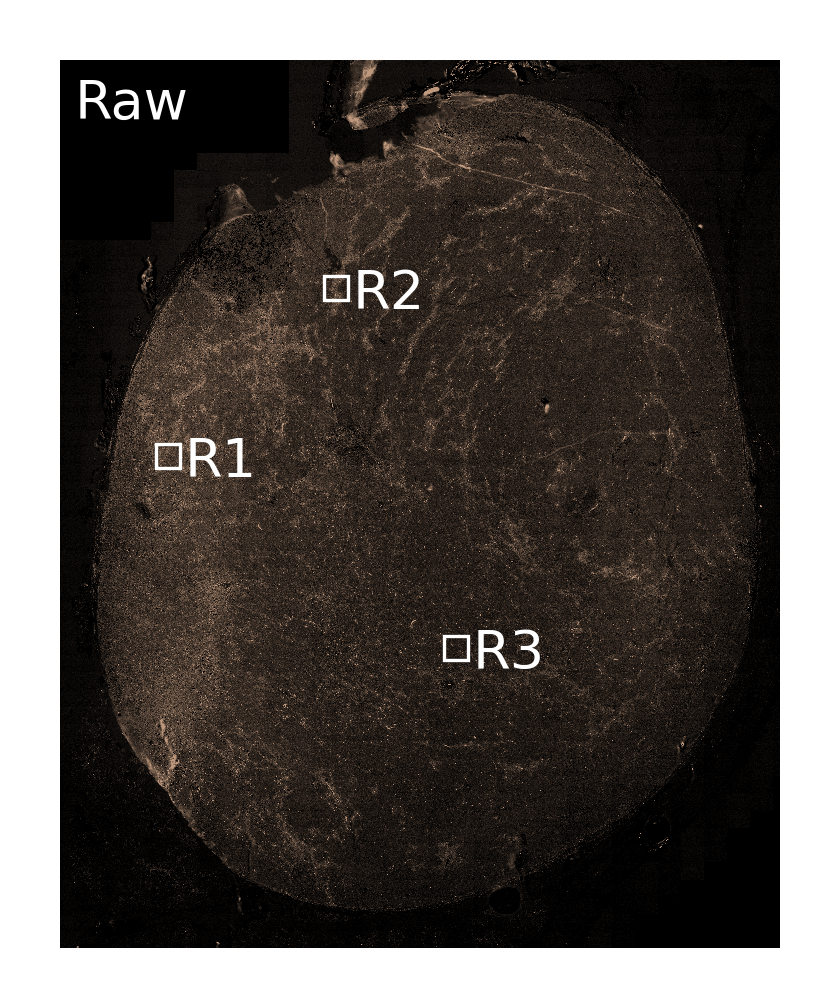

In [3]:
marker = 'CD31'
xmin, xmax, ymin, ymax = 1000, 31000, 13000, 50000
downsample = None
box_coords = (((5000, 6000), (33000, 34000)), ((12000, 13000), (40000, 41000)), ((17000, 18000), (25000, 26000)))
linewidth = 0.4

sample_id = file_name.replace('.zarr', '')
ds_with_bgcorr = xr.open_zarr(os.path.join(BASE_PATH, file_name)).pp[marker].pp[xmin:xmax, ymin:ymax]
if downsample:
    ds_with_bgcorr = ds_with_bgcorr.pp.downsample(downsample)

fig, ax = plt.subplots(figsize=(1.5, 2), dpi=600)

# Raw image
_ = (ds_with_bgcorr.pl.colorize(colors=marker_colors[marker], layer_key='_image_raw')
                   .pl.add_box(box_coords[0][0], box_coords[0][1], linewidth=linewidth, ax=ax)
                   .pl.add_box(box_coords[1][0], box_coords[1][1], linewidth=linewidth, ax=ax)
                   .pl.add_box(box_coords[2][0], box_coords[2][1], linewidth=linewidth, ax=ax)
                   .pl.imshow(ax=ax))

# Add title inside the image (top-left corner)
ax.text(
    0.02, 0.98, 'Raw',
    fontsize=font_size, color='white', 
    ha='left', va='top',
    transform=ax.transAxes,
)

# Add text to the center of each box
x_center, y_center = box_center(box_coords[0])
ax.text(
    x_center + 700, y_center, 'R1',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)
x_center, y_center = box_center(box_coords[1])
ax.text(
    x_center + 700, y_center, 'R2',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)
x_center, y_center = box_center(box_coords[2])
ax.text(
    x_center + 700, y_center, 'R3',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)


# Remove ticks
ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
ds = xr.open_zarr(os.path.join(BASE_PATH, file_name))

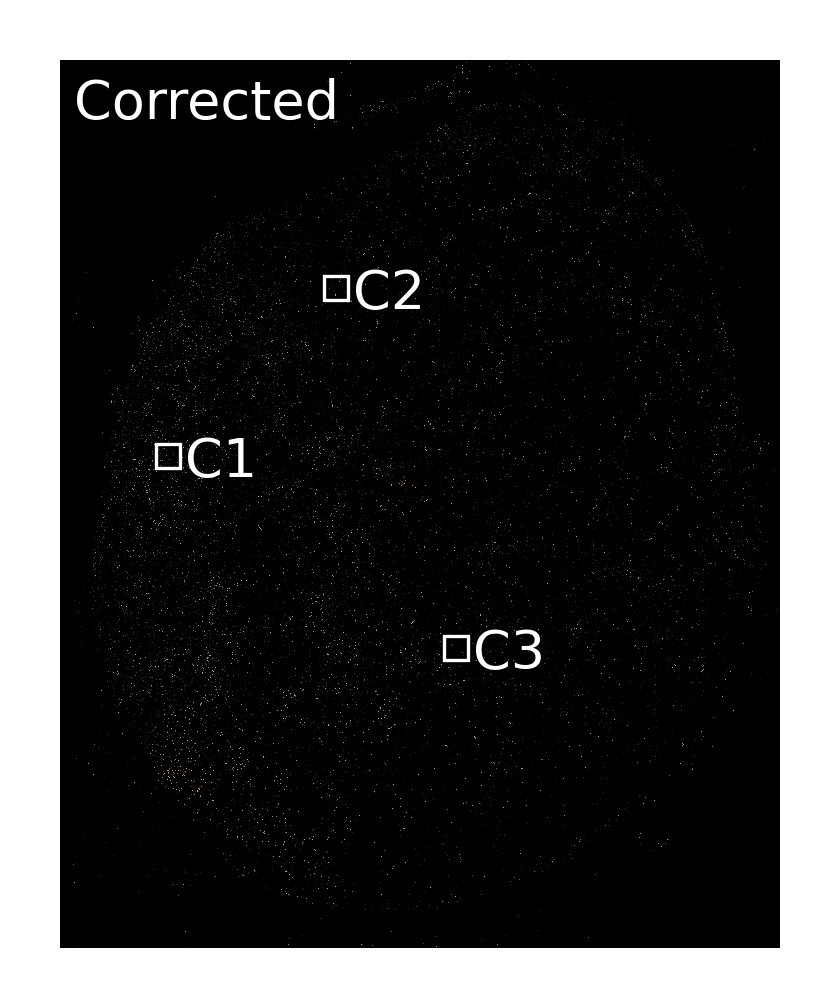

In [5]:
fig, ax = plt.subplots(figsize=(1.5, 2), dpi=600)  # Use subplots to get an axis

# Corrected image
_ = (ds_with_bgcorr.pl.colorize(colors=marker_colors[marker])
                   .pl.add_box(box_coords[0][0], box_coords[0][1], linewidth=linewidth, ax=ax)
                   .pl.add_box(box_coords[1][0], box_coords[1][1], linewidth=linewidth, ax=ax)
                   .pl.add_box(box_coords[2][0], box_coords[2][1], linewidth=linewidth, ax=ax)
                   .pl.imshow(ax=ax))

# Add the title inside the image (top-left corner)
ax.text(
    0.02, 0.98, 'Corrected',  # (x, y) in axes coordinates (0 = left/bottom, 1 = right/top)
    fontsize=font_size, color='white', 
    ha='left', va='top',
    transform=ax.transAxes,  # Use axes coordinates
)

# Add text to the center of each box
x_center, y_center = box_center(box_coords[0])
ax.text(
    x_center + 700, y_center, 'C1',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)
x_center, y_center = box_center(box_coords[1])
ax.text(
    x_center + 700, y_center, 'C2',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)
x_center, y_center = box_center(box_coords[2])
ax.text(
    x_center + 700, y_center, 'C3',  
    fontsize=font_size, color='white', 
    ha='left', va='center_baseline',
)

# Remove ticks
ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# 3.0 and 99.8 are the default normalization values used when plotting
print(np.percentile(ds_with_bgcorr['_image'].values, [3.0, 99.8], axis=(1, 2)).T)
print(np.percentile(ds_with_bgcorr['_image_raw'].values, [3.0, 99.8], axis=(1, 2)).T)

[[ 0. 20.]]
[[ 0. 73.]]


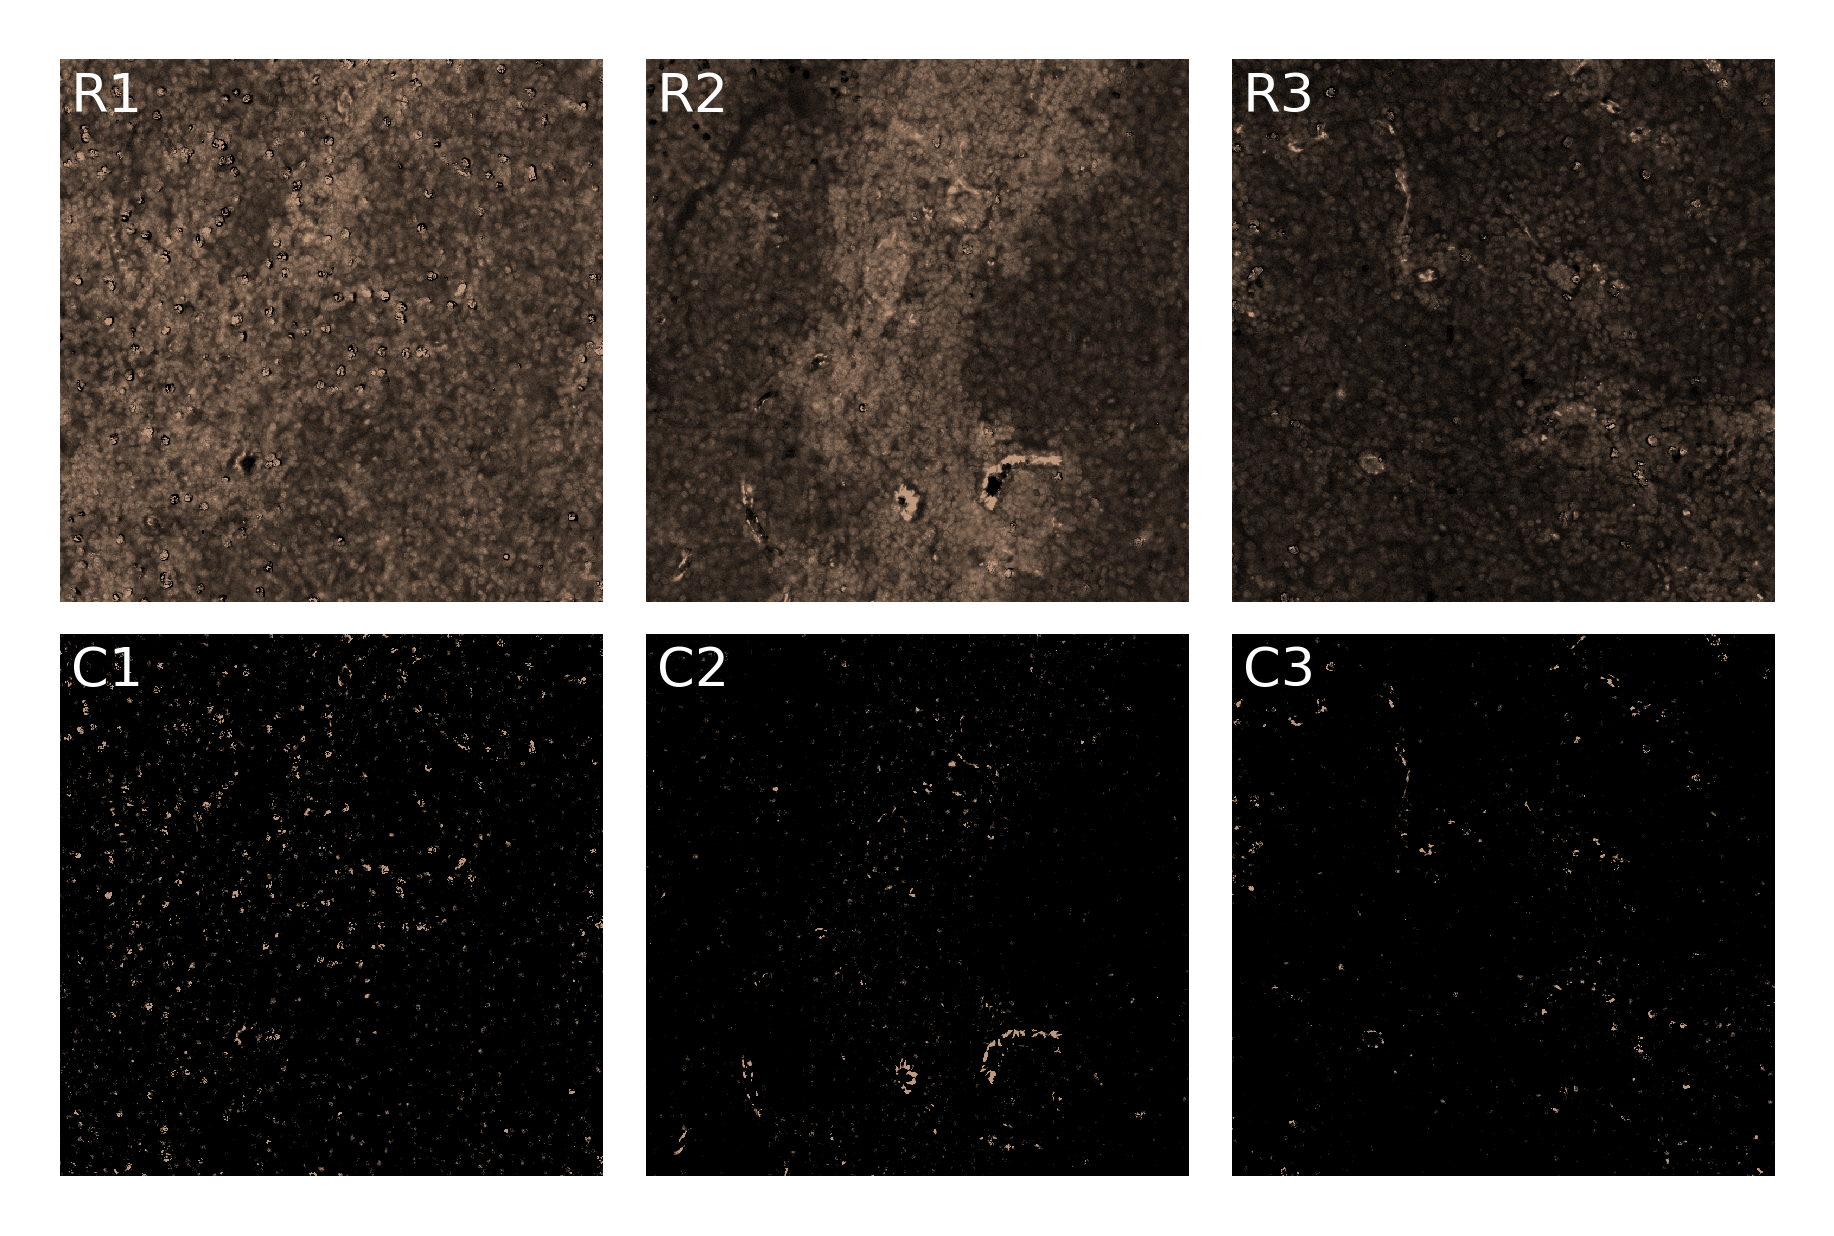

In [7]:
# these are the same values that were also used to normalize the plots above (basically then quantiles on the whole images)
amin_raw, amax_raw = 0, 73
amin_bgcorr, amax_bgcorr = 0, 20

fig, ax = plt.subplots(2, 3, figsize=(3, 2), dpi=600)  # Use subplots to get an axis
ax = ax.flatten()

# Raw image
_ = ds_with_bgcorr.pp[box_coords[0][0][0]:box_coords[0][0][1], box_coords[0][1][0]:box_coords[0][1][1]].pl.colorize(colors=marker_colors[marker], layer_key='_image_raw', amin=amin_raw, amax=amax_raw).pl.imshow(ax=ax[0])
_ = ds_with_bgcorr.pp[box_coords[1][0][0]:box_coords[1][0][1], box_coords[1][1][0]:box_coords[1][1][1]].pl.colorize(colors=marker_colors[marker], layer_key='_image_raw', amin=amin_raw, amax=amax_raw).pl.imshow(ax=ax[1])
_ = ds_with_bgcorr.pp[box_coords[2][0][0]:box_coords[2][0][1], box_coords[2][1][0]:box_coords[2][1][1]].pl.colorize(colors=marker_colors[marker], layer_key='_image_raw', amin=amin_raw, amax=amax_raw).pl.imshow(ax=ax[2])
_ = ds_with_bgcorr.pp[box_coords[0][0][0]:box_coords[0][0][1], box_coords[0][1][0]:box_coords[0][1][1]].pl.colorize(colors=marker_colors[marker], amin=amin_bgcorr, amax=amax_bgcorr).pl.imshow(ax=ax[3])
_ = ds_with_bgcorr.pp[box_coords[1][0][0]:box_coords[1][0][1], box_coords[1][1][0]:box_coords[1][1][1]].pl.colorize(colors=marker_colors[marker], amin=amin_bgcorr, amax=amax_bgcorr).pl.imshow(ax=ax[4])
_ = ds_with_bgcorr.pp[box_coords[2][0][0]:box_coords[2][0][1], box_coords[2][1][0]:box_coords[2][1][1]].pl.colorize(colors=marker_colors[marker], amin=amin_bgcorr, amax=amax_bgcorr).pl.imshow(ax=ax[5])

# Remove ticks
texts = ['R1', 'R2', 'R3', 'C1', 'C2', 'C3']
for axis, text in zip(ax, texts):
    axis.axis('off')  # Turns off ticks, labels, and borders
    
    axis.text(
        0.02, 0.98, text,  # (x, y) in axes coordinates (0 = left/bottom, 1 = right/top)
        fontsize=font_size, color='white', 
        ha='left', va='top',
        transform=axis.transAxes,  # Use axes coordinates
    )

plt.tight_layout(pad=0.5)
plt.show()